In [4]:
include("uzawa.jl")
include("data.jl")

fp (generic function with 1 method)

# Run experiment

In [5]:
nlist = [64, 128, 256, 512]
errlist = zeros(length(nlist))
iterlist = zeros(length(nlist))
ct = 1
for n in nlist
    pde_er,iters,x,xx,xxx = uzawa(n, 1e-8,10,false)
    errlist[ct] = pde_er
    iterlist[ct] = iters
    println("n = ", n, ", error = ", pde_er)
    ct += 1
end

CG-U Convergence achieved after 196 iterations.
CG-V Convergence achieved after 129 iterations.
Iteration: 1 Residual: 0.003203009200995132
CG-U Convergence achieved after 129 iterations.
CG-V Convergence achieved after 129 iterations.
Iteration: 2 Residual: 8.07641218150821e-11
Converged in 2 iterations
n = 64, error = 0.0014950792456735434


CG-U Convergence achieved after 394 iterations.
CG-V Convergence achieved after 258 iterations.
Iteration: 1 Residual: 0.002424381333674649


CG-U Convergence achieved after 258 iterations.
CG-V Convergence achieved after 258 iterations.
Iteration: 2 Residual: 1.060294300099416e-10
Converged in 2 iterations
n = 128, error = 0.0003736291028973556


CG-U Convergence achieved after 784 iterations.


CG-V Convergence achieved after 517 iterations.
Iteration: 1 Residual: 0.0017809077616887097


CG-U Convergence achieved after 517 iterations.


CG-V Convergence achieved after 517 iterations.
Iteration: 2 Residual: 1.0379644791811866e-10
Converged in 2 iterations
n = 256, error = 9.339848548399619e-5


CG-U Convergence achieved after 1553 iterations.


CG-V Convergence achieved after 1032 iterations.
Iteration: 1 Residual: 0.0012850643093210436


CG-U Convergence achieved after 1032 iterations.


CG-V Convergence achieved after 1032 iterations.
Iteration: 2 Residual: 1.1168129039818136e-10
Converged in 2 iterations
n = 512, error = 2.334907204308274e-5


In [4]:
con_order = log2((errlist[end-1]/errlist[end]+errlist[end-2]/errlist[end-1]+errlist[end-3]/errlist[end-2])/3)
println("convergence order = ", con_order)

convergence order = 2.000237660426312


In [3]:
println(errlist)
println(iterlist)

[0.0014950792456735434, 0.0003736291028973556, 9.339848548399619e-5, 2.334907204308274e-5]
[2.0, 2.0, 2.0, 2.0]


# Ploting

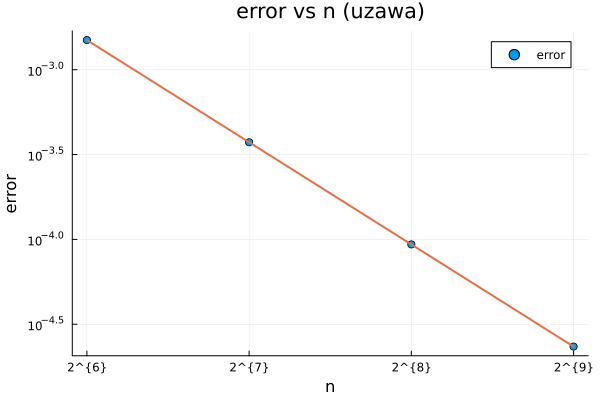

In [6]:
using Plots
xticks = [64, 128, 256, 512]
ymin = errlist[1]
ymax = errlist[end]
#4 ticks logscale evenly spaced between ymin and ymax
ys = -5.0:0.5:-2.5
yticks = 10.0 .^ ys
scatter(nlist, errlist, label="error", xlabel="n", ylabel="error", title="error vs n (uzawa)", xscale=:log2, yscale=:log10, grid=true, markersize=4, xticks=xticks, yticks=yticks)
plot!(nlist, errlist, label="", xlabel="n", ylabel="error", xscale=:log2, yscale=:log10, grid=true, linewidth=2, xticks=xticks, yticks=yticks)
#savefig("uzawa_error_vs_n.pdf")

# Benchmark

In [19]:
results = Dict()
using BenchmarkTools
for n in nlist
    @btime uzawa($n)
end


  16.955 ms (4792 allocations: 73.82 MiB)


  142.637 ms (9472 allocations: 587.61 MiB)


  1.640 s (18808 allocations: 4.57 GiB)


  27.069 s (37320 allocations: 36.38 GiB)


 - 16.955 ms (4792 allocations: 73.82 MiB)
 - 142.637 ms (9472 allocations: 587.61 MiB)
 - 1.640 s (18808 allocations: 4.57 GiB)
 - 27.069 s (37320 allocations: 36.38 GiB)